<h2>Jigsaw Unintended Bias in Toxicity Classification</h2>

<h2>Contents:</h2>

1. Business problem
    
2. Use of ML in the blog

3. Source of Data

4. My approach to solve this Business Problem

5. Exploratory Data Analysis

6. Data Preprocessing

7. Models

<h2>1. Business problem:</h2>

The objective was to detect toxic comments and reduce the unintended bias of the model.

### Problem Description

The Conversation AI team (it is research initiated by Jigsaw and Google) build a toxicity model, they found that the model incorrectly learned to associate the names of frequently attacked identities with toxicity. So the model predicted high toxicity for those comments which contain words like gay, black, Muslim, white, lesbian, etc, even when comments were not actually toxic (e.g. I am a gay woman.). This happened because the dataset was collected from the sources where such words (or identities) are considered as highly offensive. A model is needed to be build which can find the toxicity in the comments and minimize the unintended bias with respect to some identities.

1. A toxic comment is that comments which are offensive and sometimes they make some people leave the discussion (on public forums).
    
2. unintended bias is related to unplanned bias which happened because the data was collected from such sources which considered some words (or identities) very offensive.

### Background info

When the Conversation AI team first built toxicity models, they found that the models incorrectly learned to associate the names of frequently attacked identities with toxicity. Models predicted a high likelihood of toxicity for comments containing those identities (e.g. “gay”), even when those comments were not actually toxic (such as “I am a gay woman”). This happens because training data was pulled from available sources where, unfortunately, certain identities are overwhelmingly referred to in offensive ways. Training a model from data with these imbalances risks simply mirroring those biases back to users.

So we have to build a model that recognizes toxicity and minimizes this type of unintended bias with respect to mentions of identities.

### Problem Statement

The model which was built by The Conversation AI team has the problem of unintended bias and this has to be removed (or minimized) because of this the comments which are not actually toxic will be predicted as toxic and this is not good for our business.

<h2>2. Use of ML in the blog</h2>

#### Using Logistic Regression and Naive Bayes to solve this business problem

Here I am Building Logistic Regression and Naive Bayes models to solve the business Problem. Because If we are thinking to solve  NLP problem 1st model who is giving good acccuracy for me is "Logistic Regression" model. Logistic regression is commonly applied to all sorts of NLP tasks, and any propertyof the input can be a feature. 

logistic regression is one of the most important analytic tools in the socialand natural sciences. In natural language processing, logistic regression is the base-line supervised machine learning algorithm for classification.

Logistic regression can be used to classify an observation into one of two classes(like ‘positive sentiment’ and ‘negative sentiment’),  or into one of many classes.Because the mathematics for the two-class case is simple.

So with these advantages ML algorithms will solve this problem much accurately.

#### Difference bitween Logistic Regression and Naive Bayes

Generative and Discriminative Classifiers:The most important difference be-tween naive Bayes and logistic regression is that logistic regression is a discriminative classifier while naive Bayes is agenerative classifier.These are two very different frameworks for howto build a machine learning model. Discriminative model, by contrast, is only try-ing to learn to distinguish the classes (perhaps with-out  learning  much  about  them). 

<h2>3. Source of Data</h2>

Dataset for this study is downloaded from Dataset for this study is downloaded from here https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data.

<h2>4. My approach to solve this Business Problem</h2>

There is one training data file named as train.csv and one test file named as test.csv. There are 45 columns in train data and two columns in test data. The names of two columns of test data are id & comment_text. So only text data will be used to train the models. There are many identities in train data but only a few are required and these identities are male, female, homosexual_gay_or_lesbian, christian, jewish, muslim, black, white, psychiatric_or_mental_illness. These identities will help in calculating the final metric.. There is one training data file named as train.csv and one test file named as test.csv. There are 45 columns in train data and two columns in test data. The names of two columns of test data are id & comment_text. So only text data will be used to train the models. There are many identities in train data but only a few are required and these identities are male, female, homosexual_gay_or_lesbian, christian, jewish, muslim, black, white, psychiatric_or_mental_illness. These identities will help in calculating the final metric.

Given data have total 1804874 comments and 45 attributes. Out of 45 attributes, only a few of them will be used for modelling. Few will be used to check the model bias.

Few of them are:

1. “Comment_text” — comment text
    
2. “Target” — This is used for the actual class label. This has values in the range between 0.0–1.0. Where 0.0 being non-toxic and 1.0 being extremely toxic. So we’ll consider all the comments having target<0.5 as non-toxic and target>=0.5 as a toxic comment.
    
3. Columns related to race or ethnicity like Asian, black, Jewish, etc
    
4. Columns related to gender like male, female, etc
    
5. Columns related to sexual orientation like bisexual, heterosexual, homosexual_gay_or_lesbian, etc
    
6. Columns related to religion like an atheist, Buddhist, Christian, Hindu, Muslim, etc

So basically we’re given Identity-based features that can be broadly divided into 4 groups(As we can see above). Later on, these features will be used to check model bias.

The data set provided by Jigsaw was large with 1.8 million comments. The data set contains 45 columns but only few of them are of our use. The “comment_text” column contains the comment and “target” column shows how toxic a comment is. This is the value our model should predict at test time. A value ≥0.5 means comment is toxic (positive).

Other columns that were of interest were the 9 identity columns (subgroups) namely ‘male’, ‘female’,‘black’,“christian”, ‘jewish’, ‘muslim’, ‘white’, ‘psychiatric_or_mental_illness’, ‘homosexual_gay_or_lesbian’. We will use these columns to improve our model’s performance. You will get to know about this in later part of this blog.

The data set is highly imbalanced with around 8% points belonging to class 1(toxic comments) and 92% belonging to class 0(non toxic comments).

#### So after looking all the data my approach to solve this problem is with Logistic Regression. Whom I have used many times to solve other classification and NLP problems apart from that I am  trying another ML alorithm Naive Bayes to see which algorithm is more accurate and recognizes toxicity and minimizes this type of unintended bias with respect to mentions of identities.

<h2>Machine Learning Problem</h2>

This a binary classification problem. Where positive class- Toxic, Negative class-Non_toxic.

In [1]:
# importing required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from keras.layers import Activation,Input,CuDNNLSTM,CuDNNGRU, Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.utils import to_categorical,plot_model
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model,Sequential
from keras import regularizers
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.initializers import he_normal,Orthogonal
from keras.regularizers import l2
from keras.constraints import max_norm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import re
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns

Using TensorFlow backend.


<h2>5. Exploratory Data Analysis</h2>

After doing some google search and going through multiple articles I designed 14 new features.

1. word_count: Total Number of words in the sentence
    
2. char_count: total number of characters in the sentence (word_count <= char_count)
    
3. word_density: Density of words in the sentence
    
4. total_length: total length of the sentence (it includes extra spaces, special character, etc.)
    
5. capitals: Number of capital character in the sentence
    
6. caps_vs_length: the ratio of the number of capital words to the total length of the sentence. caps_vs_lenght=capitalstotal_lenght
    
7. punc_count: Number of punctuation in the sentence
    
8. num_exclamation_marks: Number of exclamation marks (!)
    
9. exlamation_vs_punc_count: the ratio of the number of exclamation marks to the total number of punctuation. exlamation_vs_punc_count=num_exclamation_markspunc_count
    
10. num_question_marks: The number of question marks (?)
    
11. question_vs_punc_count: the ratio of the number of question marks to the total number of punctuation.
    
12. num_symbols: Number of symbols (@, #, $, %, ^, &, *, ~)
    
13. num_unique_words: Number of unique word in the sentence
    
14. words_vs_unique: ratio of unique words to total word words_vs_unique=num_unique_wordword_count

<h2>Reading data</h2>

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
print("Target column has", train['target'].isna().sum(), "missing values")
print("comment_text column has", train['comment_text'].isna().sum(), "missing values")

Target column has 0 missing values
comment_text column has 0 missing values


In [ ]:
# distribution of word count of comment_text of train dataframe
word_count = train['comment_text'].str.split().apply(len).value_counts().sort_index()

In [13]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [14]:
data = train.sample(frac=0.5)
print("Mean value for the target column:  ", data["target"].mean())
print("Number of targets higher than 0.5: ", data[(data['target'] >0.5)]["target"].count())
print("Number of targets higher than 0.0: ", data[(data['target'] >0.0)]["target"].count())
print("Number of comments:                ", len(data))

Mean value for the target column:   0.10285166962238576
Number of targets higher than 0.5:  53162
Number of targets higher than 0.0:  269389
Number of comments:                 902437


In [15]:
data['label'] = np.where(data['target']>0,1,0)
label_list = list(data['label'].unique())
label_list
print("Number of targets higher than 0.0: ", data[(data['target'] >0.0)]["target"].count())

Number of targets higher than 0.0:  269389


In [16]:
# this is a fraction of the sample fraction. Essentially we should always keep this between 0.7-0.9
training_frac = 0.8
train_len = int(len(data)*training_frac)
valid_len = int(len(data)*(1.0-training_frac))

train = data.iloc[:train_len, :]
valid = data.iloc[:valid_len, :]

In [17]:
train0 = train[train["label"]==0]
train1 = train[train["label"]==1]
train0["count"] = train0['comment_text'].str.split().str.len()
train1["count"] = train1['comment_text'].str.split().str.len()

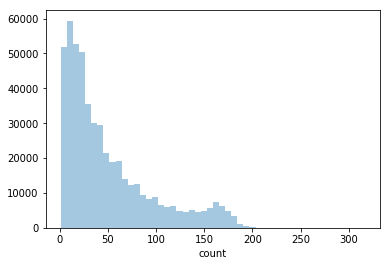

In [18]:
import seaborn as sns
x = pd.Series(train0["count"])
ax = sns.distplot(x, kde=False)

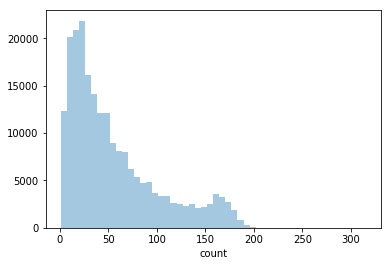

In [19]:
import seaborn as sns
x = pd.Series(train1["count"])
ax = sns.distplot(x, kde=False)

In [20]:
total_comments = train.shape[0]
n_unique_comments = train['comment_text'].nunique()
n_comments_both = len(set(train['comment_text'].unique()) & set(test['comment_text'].unique()))
print('Train set: %d rows and %d columns.' % (total_comments, train.shape[1]))
display(train.head())
display(train.describe())

Train set: 721949 rows and 46 columns.


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,label
1396544,5825396,0.0,"Correct, Trump doesn't need to duck questions ...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,approved,0,0,0,4,4,0.0,0,5,0
888178,5206997,0.0,"I agree that God cannot change what is true, i...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,approved,2,0,0,0,0,0.0,6,4,0
1480551,5931987,0.0,Life saved.,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,approved,0,0,0,1,0,0.0,0,4,0
1426273,5862245,0.3,Whew...that's a tough call. I've been to cultu...,0.0,0.0,0.0,0.2,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,10,1
1237400,5626808,0.0,Bravo!,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,approved,0,0,1,2,0,0.0,0,10,0


,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,label
count,7.219490e+05,721949.000000,721949.000000,721949.000000,721949.000000,721949.000000,721949.000000,162081.000000,162081.000000,162081.000000,...,721949.000000,721949.000000,721949.000000,721949.000000,721949.000000,721949.000000,721949.000000,721949.000000,721949.000000,721949.000000
mean,3.735410e+06,0.103055,0.004556,0.013904,0.022605,0.081146,0.009365,0.011948,0.003174,0.001815,...,281199.968872,0.276204,0.044161,0.109580,2.445332,0.583946,0.006636,1.437074,8.686947,0.298881
std,2.445943e+06,0.197252,0.022781,0.064604,0.078556,0.176150,0.049618,0.087099,0.049692,0.025414,...,103992.651078,1.039314,0.244573,0.460842,4.730845,1.871268,0.045400,17.704930,41.584847,0.457768
min,5.984900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,7.946510e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,160037.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,5.223090e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,332081.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,5.768680e+06,0.166667,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,...,366171.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,6.334010e+06,1.000000,0.644363,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,399537.000000,94.000000,21.000000,31.000000,224.000000,173.000000,1.000000,1854.000000,4897.000000,1.000000


In [21]:
print('Test set: %d rows and %d columns.' % (test.shape[0], test.shape[1]))
display(test.head())
print('Number of unique comments: %d or %.2f%%'% (n_unique_comments, (n_unique_comments / total_comments * 100)))
print('Number of comments that are both in train and test sets: %d'% n_comments_both)

Test set: 97320 rows and 2 columns.


,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


Number of unique comments: 715363 or 99.09%
Number of comments that are both in train and test sets: 844


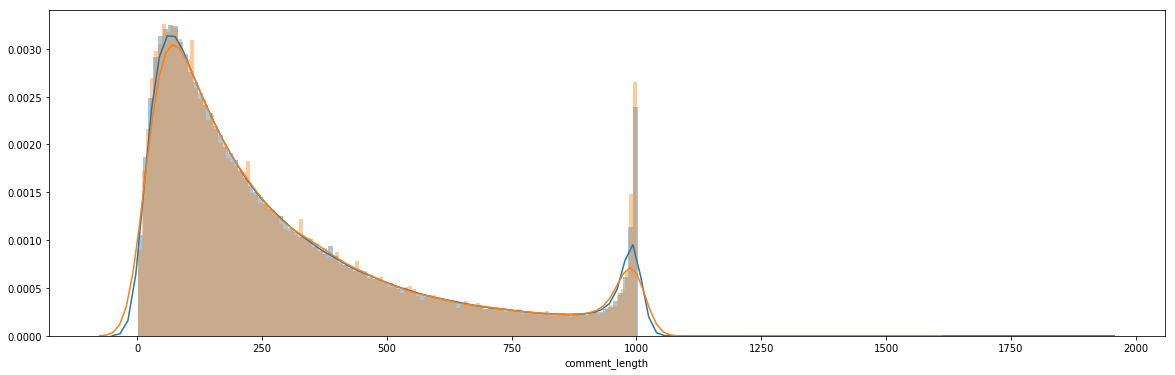

In [22]:
train['comment_length'] = train['comment_text'].apply(lambda x : len(x))
test['comment_length'] = test['comment_text'].apply(lambda x : len(x))
train['word_count'] = train['comment_text'].apply(lambda x : len(x.split(' ')))
test['word_count'] = test['comment_text'].apply(lambda x : len(x.split(' ')))
bin_size = max(train['comment_length'].max(), test['comment_length'].max())//10

plt.figure(figsize=(20, 6))
sns.distplot(train['comment_length'], bins=bin_size)
sns.distplot(test['comment_length'], bins=bin_size)
plt.show()

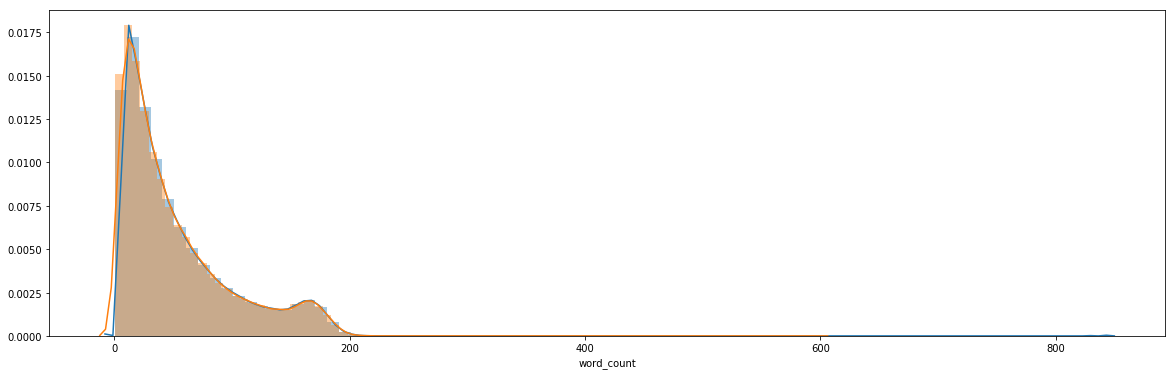

In [23]:
bin_size = max(train['word_count'].max(), test['word_count'].max())//10
plt.figure(figsize=(20, 6))
sns.distplot(train['word_count'], bins=bin_size)
sns.distplot(test['word_count'], bins=bin_size)
plt.show()

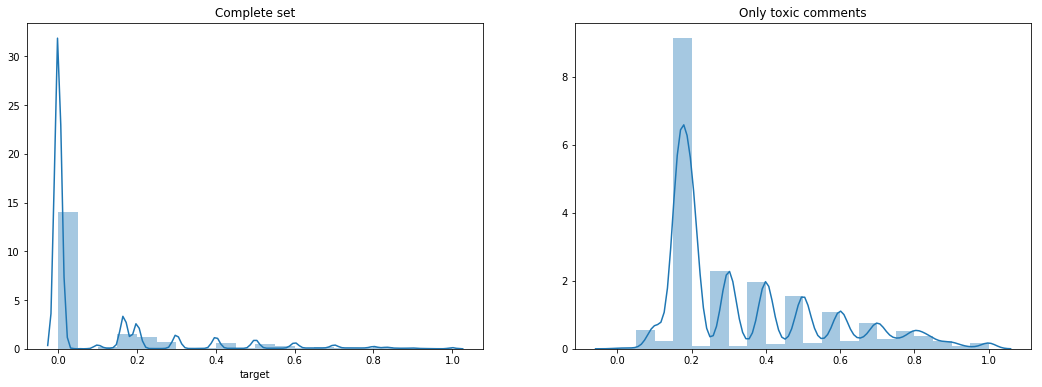

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(train['target'], bins=20, ax=ax1).set_title("Complete set")
sns.distplot(train[train['target'] > 0]['target'].values, bins=20, ax=ax2).set_title("Only toxic comments")
plt.show()

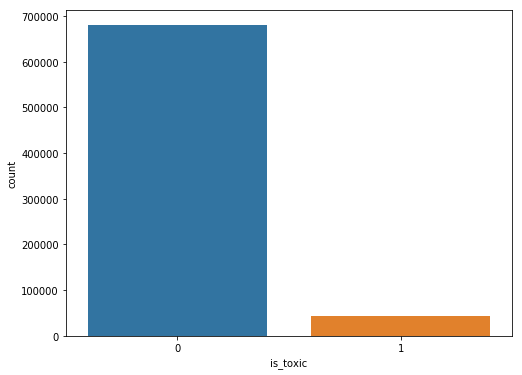

In [25]:
train['is_toxic'] = train['target'].apply(lambda x : 1 if (x > 0.5) else 0)
plt.figure(figsize=(8, 6))
sns.countplot(train['is_toxic'])
plt.show()

<h2>Observation:</h2>

By observing Above Graph, We Found Data is Imbalance.

In [26]:
# Lets also see how many missing values (in percentage) we are dealing with
miss_val_train_df = train.isnull().sum(axis=0) / train_len
miss_val_train_df = miss_val_train_df[miss_val_train_df > 0] * 100
miss_val_train_df

asian                                  77.549522
atheist                                77.549522
bisexual                               77.549522
black                                  77.549522
buddhist                               77.549522
christian                              77.549522
female                                 77.549522
heterosexual                           77.549522
hindu                                  77.549522
homosexual_gay_or_lesbian              77.549522
intellectual_or_learning_disability    77.549522
jewish                                 77.549522
latino                                 77.549522
male                                   77.549522
muslim                                 77.549522
other_disability                       77.549522
other_gender                           77.549522
other_race_or_ethnicity                77.549522
other_religion                         77.549522
other_sexual_orientation               77.549522
physical_disability 

In [27]:
# lets create a list of all the identities tagged in this dataset. This list given in the data section of this competition. 
identities = ['male','female','transgender','other_gender','heterosexual','homosexual_gay_or_lesbian',
              'bisexual','other_sexual_orientation','christian','jewish','muslim','hindu','buddhist',
              'atheist','other_religion','black','white','asian','latino','other_race_or_ethnicity',
              'physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness',
              'other_disability']
# getting the dataframe with identities tagged
train_labeled = train.loc[:, ['target'] + identities ].dropna()
# lets define toxicity as a comment with a score being equal or .5
# in that case we divide it into two dataframe so we can count toxic vs non toxic comment per identity
toxic = train_labeled[train_labeled['target'] >= .5][identities]
non_toxic = train_labeled[train_labeled['target'] < .5][identities]

In [28]:
# at first, we just want to consider the identity tags in binary format. So if the tag is any value other than 0 we consider it as 1.
toxic_count = toxic.where(train_labeled == 0, other = 1).sum()
non_toxic_count = non_toxic.where(train_labeled == 0, other = 1).sum()

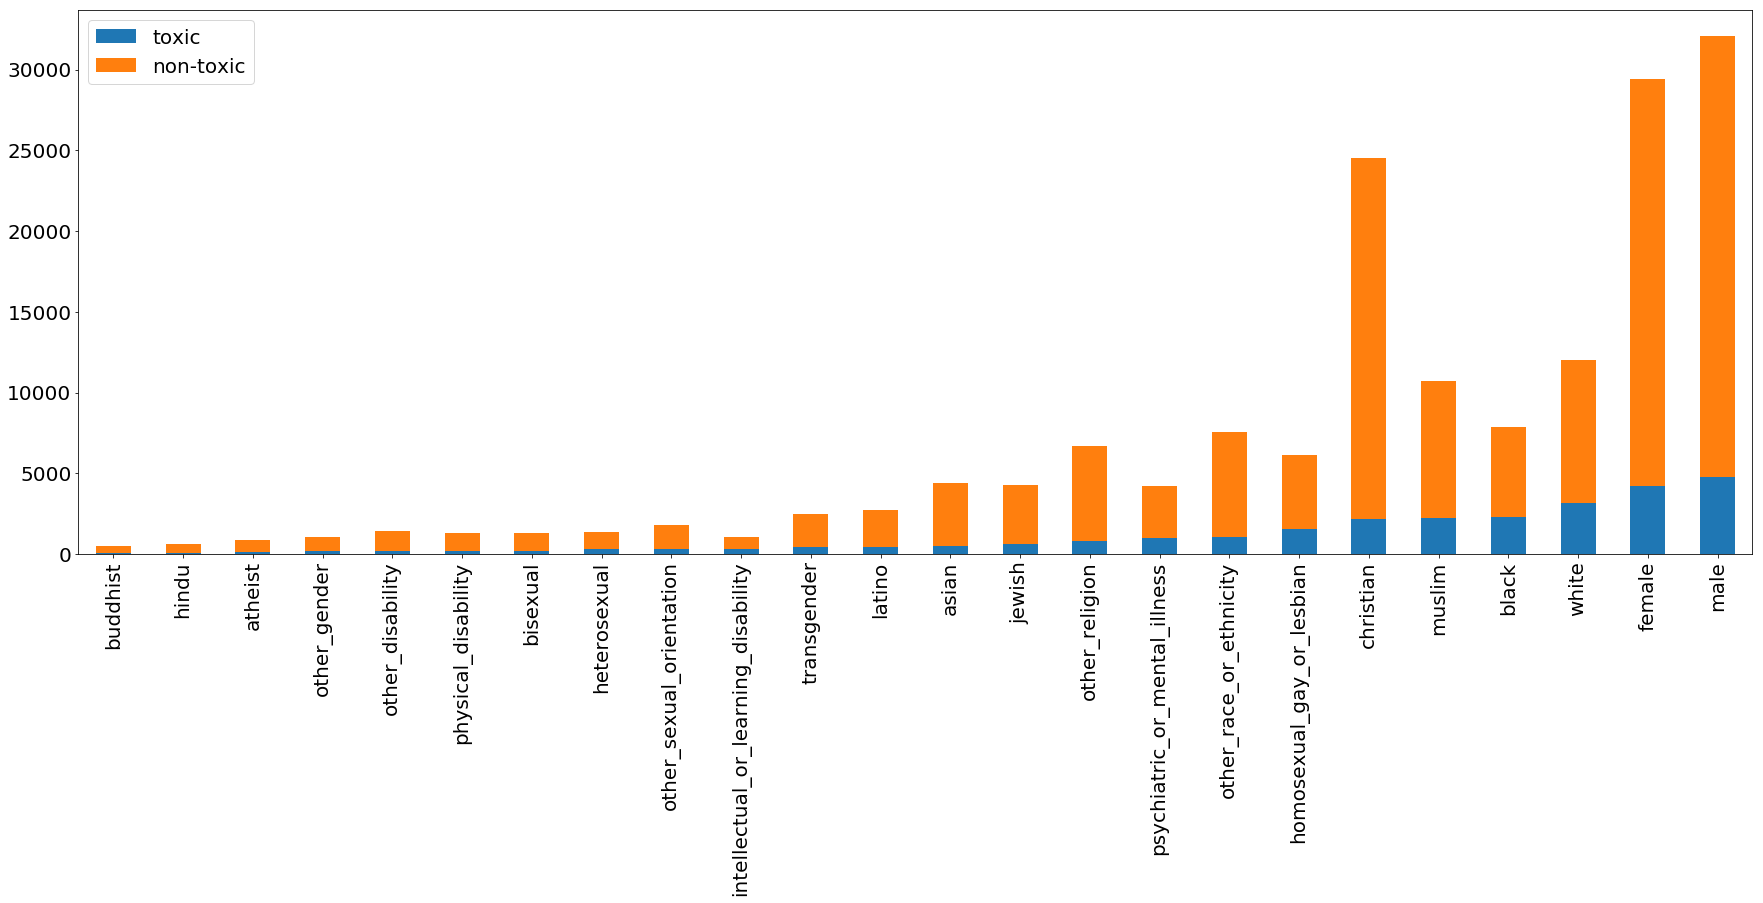

In [29]:
toxic_vs_non_toxic = pd.concat([toxic_count, non_toxic_count], axis=1)
toxic_vs_non_toxic = toxic_vs_non_toxic.rename(index=str, columns={1: "non-toxic", 0: "toxic"})
# here we plot the stacked graph but we sort it by toxic comments to (perhaps) see something interesting
toxic_vs_non_toxic.sort_values(by='toxic').plot(kind='bar', stacked=True, figsize=(30,10), fontsize=20).legend(prop={'size': 20})

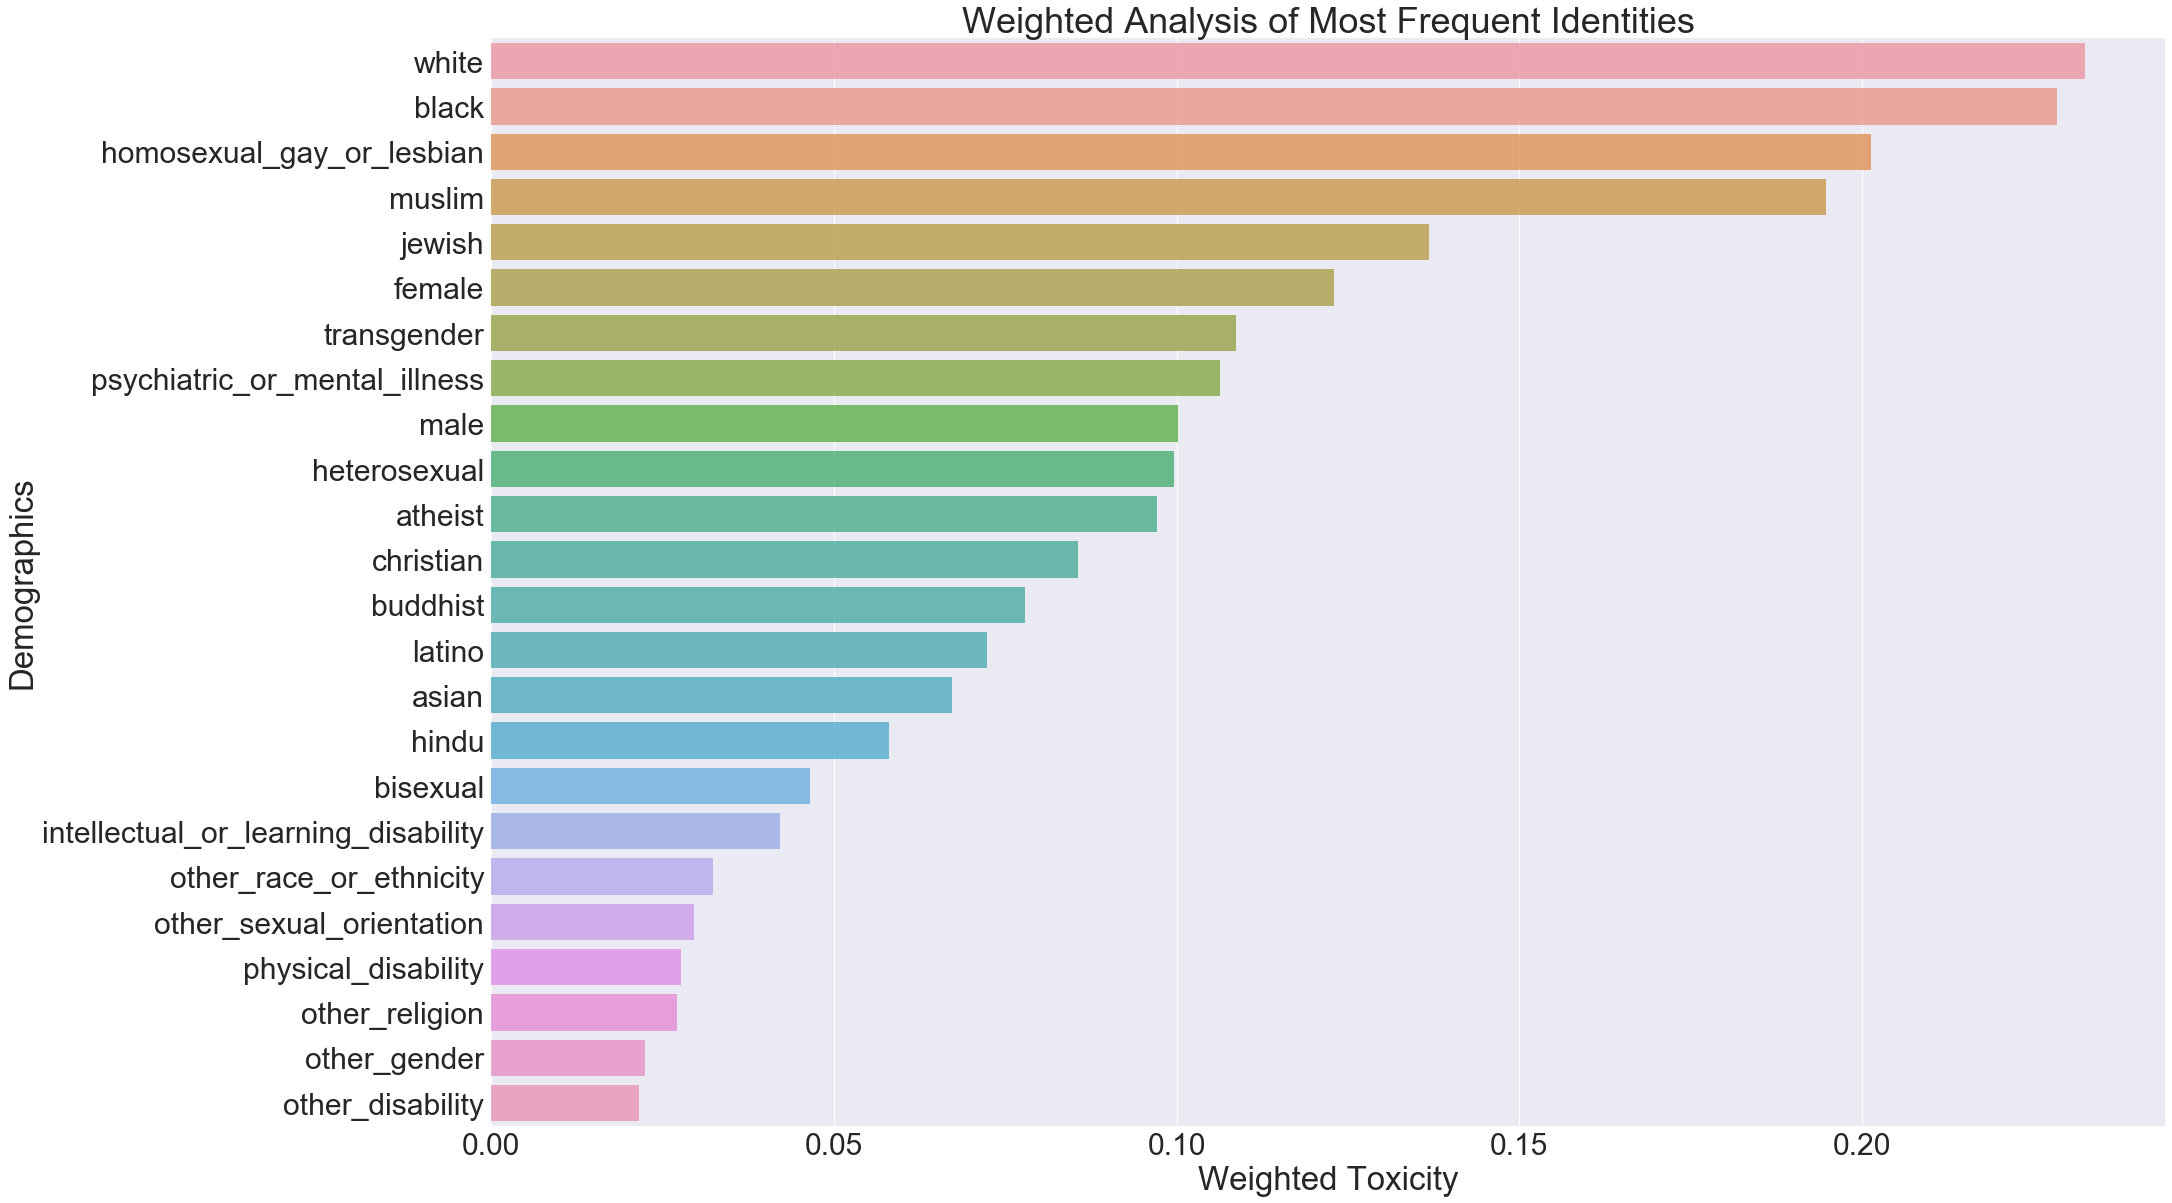

In [30]:
# First we multiply each identity with the target
weighted_toxic = train_labeled.iloc[:, 1:].multiply(train_labeled.iloc[:, 0], axis="index").sum() 
# changing the value of identity to 1 or 0 only and get comment count per identity group
identity_label_count = train_labeled[identities].where(train_labeled == 0, other = 1).sum()
# then we divide the target weighted value by the number of time each identity appears
weighted_toxic = weighted_toxic / identity_label_count
weighted_toxic = weighted_toxic.sort_values(ascending=False)
# plot the data using seaborn like before
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values , y = weighted_toxic.index, alpha=0.8)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxicity')
plt.title('Weighted Analysis of Most Frequent Identities')
plt.show()

In [31]:
# lets take the dataset with identitiy tags, created date, and target column
with_date = train.loc[:, ['created_date', 'target'] + identities].dropna()
# next we will create a weighted dataframe for each identity tag (like we did before)
# first we divide each identity tag with the total value it has in the dataset
weighted = with_date.iloc[:, 2:] / with_date.iloc[:, 2:].sum()
# then we multiplty this value with the target 
target_weighted = weighted.multiply(with_date.iloc[:, 1], axis="index")
# lets add a column to count the number of comments
target_weighted['comment_count'] = 1
# now we add the date to our newly created dataframe (also parse the text date as datetime)
target_weighted['created_date'] = pd.to_datetime(with_date['created_date'].apply(lambda dt: dt[:10]))
# now we can do a group by of the created date to count the number of times a identity appears for that date
identity_weight_per_date = target_weighted.groupby(['created_date']).sum().sort_index()

In [32]:
# lets group most of the identities into three major categories as follows for simplified analysis
races = ['black','white','asian','latino','other_race_or_ethnicity']
religions = ['atheist', 'buddhist', 'christian', 'hindu', 'muslim', 'jewish','other_religion']
sexual_orientation = ['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']

Text(0,0.5,'Weighted Toxic Score')

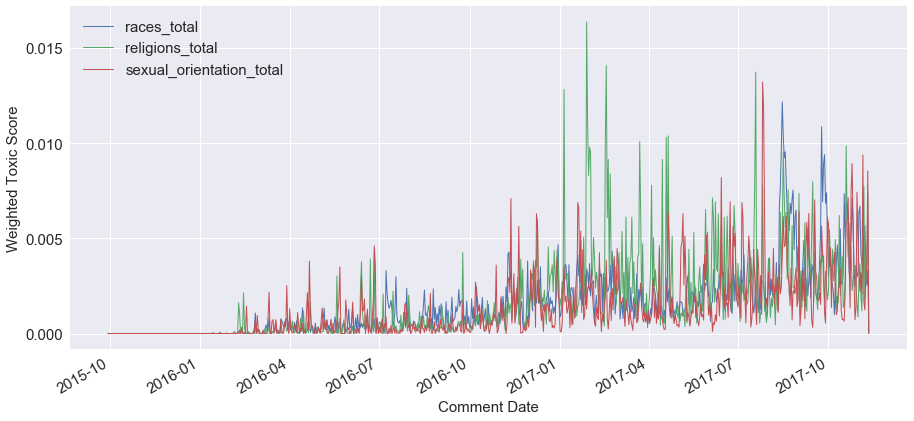

In [33]:
# lets create a column to aggregate our weighted toxicity score per identity group
identity_weight_per_date['races_total'] = identity_weight_per_date[races].sum(axis=1)
identity_weight_per_date['religions_total'] = identity_weight_per_date[religions].sum(axis=1)
identity_weight_per_date['sexual_orientation_total'] = identity_weight_per_date[sexual_orientation].sum(axis=1)
# and then plot a time-series line plot per identity group
identity_weight_per_date[['races_total', 'religions_total', 'sexual_orientation_total']].plot(figsize=(15,7), linewidth=1, fontsize=15) 
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Comment Date', fontsize=15)
plt.ylabel('Weighted Toxic Score', fontsize=15)

Text(0,0.5,'Relative Weighted Toxic Score')

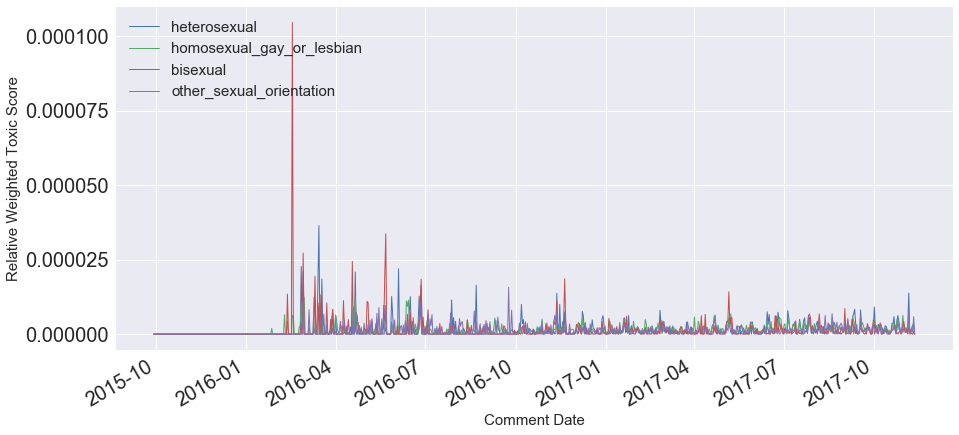

In [38]:
# lets plot relative weighted toxic score for each identity of sexual orientation
identity_weight_per_date[sexual_orientation].div(identity_weight_per_date['comment_count'], axis=0).plot(figsize=(15,7), linewidth=1, fontsize=20)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Comment Date', fontsize=15)
plt.ylabel('Relative Weighted Toxic Score', fontsize=15)

<h2>References:</h2>
1. https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification
2. https://medium.com/the-artificial-impostor/notes-jigsaw-unintended-bias-in-toxicity-classification-fd6c8d3e7459
3. https://forums.fast.ai/t/jigsaw-unintended-bias-in-toxicity-classification-kaggle-competition-with-fastai/43215
4. https://refind.com/link/32019527

<h2>6. Data Preprocessing</h2>

In [39]:
# We clean the essay text data
# For this task, we have defined some helper functions
# The same function and code snippet will be used to clean project title
# https://stackoverflow.com/a/47091490/4084039

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [40]:
# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [41]:
# Cleaning Text feature
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(train['comment_text'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_text.append(sent.lower().strip())
train["comment_text"] = preprocessed_text

100%|████████████████████████████████████████████████████████████████████████| 721949/721949 [08:49<00:00, 1363.22it/s]


In [42]:
# Combining all the above statemennts 
preprocessed_comments_test = []
# tqdm is for printing the status bar
for sentence in tqdm(test['comment_text'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_comments_test.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 97320/97320 [01:07<00:00, 1442.23it/s]


In [48]:
## convert text into lower case
train['comment_text'] = train['comment_text'].str.lower()

In [49]:
X = train['comment_text']

In [50]:
y = np.where(train['target'] >= 0.5, True, False) * 1

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X_train = X_train.take(np.random.permutation(len(X_train))[:97320])

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer()

In [54]:
X_train = Vectorizer.fit_transform(X_train)
X_test = Vectorizer.transform(X_test)

In [55]:
test_1= Vectorizer.transform(test['comment_text'])

In [56]:
y_train = y_train.take(np.random.permutation(len(y_train))[:97320])
y_test = y_test.take(np.random.permutation(len(y_test))[:97320])

<h2>7. Models</h2>

<h2>1) Logistic Regression</h2>

<h2> Applying Logistic Regression with L1 regularization</h2>

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
x_train = sc.fit_transform(X_train)
x_test = sc.transform(test_1)

In [59]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#Using GridSearchCV
model = LogisticRegression(penalty='l1'), tuned_parameters, scoring = 'roc_auc',n_jobs=-1, 
                     pre_dispatch=2)
model.fit(x_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
y_pred = model.predict(x_test)

# Hyper parameter Tuning
# Performance of Model for each Hyperparameter

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

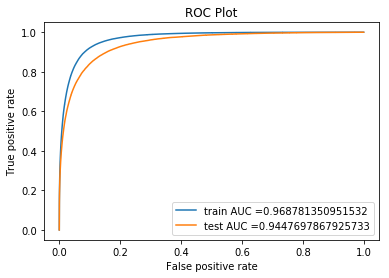

In [78]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Plot")
plt.show()

In [91]:
lr_predictions = model.predict_proba(test_1)[:,1]

<h2>Reference:</h2>

1. https://stackoverflow.com/a/47091490/4084039
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
4. https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

<h2>2) Naive Bayes</h2>

In [92]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
y_pred = model.predict(x_test)

# Hyper parameter Tuning
# Performance of Model for each Hyperparameter

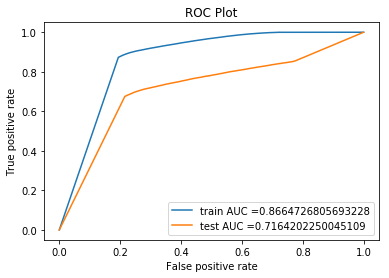

In [96]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Plot")
plt.show()

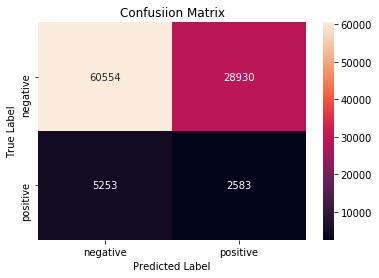

In [103]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [112]:
naive_predictions = model.predict_proba(test_1)[:,1]

In [121]:
submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['prediction'] = lr_predictions
submission.to_csv('submission.csv')
submission.head()

<h2>Reference:</h2>

1. https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
2. https://scikit-learn.org/stable/modules/naive_bayes.html
3. https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c
4. http://www.statsoft.com/textbook/naive-bayes-classifier

<h2>Conclusion:</h2>

In [113]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["MOdel","AUC"]

x.add_row(["Logistic Regression","94.47%"])
x.add_row(["Naive Bayes","71.64%"])

print(x)

+---------------------+--------+
|        MOdel        |  AUC   |
+---------------------+--------+
| Logistic Regression | 94.47% |
|     Naive Bayes     | 71.64% |
+---------------------+--------+
